## LAB: Convergence Analysis of the Upwind Scheme

Name: Berkay Doruk

Album Number: 4093437

Lab no: 3

## 1. Introduction

This report is to convergence study of the **1D linear advection equation** solved with **upwind scheme**. Our goal is to see how the numerical error decreases as we refine the grid while keeping the Courant number constant. The advection equation is:

$$
\frac{\partial \phi}{\partial t} + u \frac{\partial \phi}{\partial x} = 0,
$$

and the Courant number is defined as

$$
C = \frac{u \, \Delta t}{\Delta x}.
$$

We choose a value for $C$ between 0 and 1 (excluding 0 and 1) and change the spatial step size

$$
\Delta x
$$

or the time step

$$
\Delta t,
$$

(with $\Delta t$ adjusted to keep $C$ constant). For each simulation, we calculate the **RMSE** (root-mean-square error) to compare the numerical solution to the analytical solution.

## 2. Parameter Definitions

We define the simulation parameters as follows:

- **$u$**: Constant velocity, set to $u = 1.0$, which determines the speed of the wave.
- **$L$**: Domain length, set to $L = 1.0$, which specifies the spatial extent.
- **$T_{\text{final}}$**: Final time, set to $T = 0.5$, the time until which the simulation runs.
- **`nx_values`**: An array of grid resolutions (e.g., [50, 100, 200, 400]) to test convergence.
- **$C$**: Courant number; we will compare three values: $C = 0.5$, $C = 0.7$, and $C = 0.9$.

Keeping $C$ constant ensures that the ratio between the time step and spatial step remains fixed across all simulations.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

u = 1.0           # Constant velocity
L = 1.0           # Domain length
T_final = 0.5     # Final time

nx_values = [50, 100, 200, 400]  # Different grid resolutions
C_values = [0.5, 0.7, 0.9]       # Three Courant numbers to compare

## 3. Defining the Initial Condition and Analytical Solution

We use a sine wave as the initial condition because it is smooth and periodic, which is ideal for problems with periodic boundary conditions. The analytical solution is obtained by shifting the initial condition by $u \cdot t$, representing the exact solution of the advection equation.

Initial condition:
$$
\sin\left( \frac{2\pi x}{L} \right)
$$

Analytic solution:
$$
\sin\left(2\pi\,\frac{(x - u\,t)}{L}\right)
$$

In [29]:
def initial_condition(x):
    return np.sin(2 * np.pi * x / L)

def analytic_solution(x, t):
    return np.sin(2 * np.pi * ((x - u * t)) / L)

## 4. Upwind Scheme

The upwind scheme is a first-order numerical method that updates the solution based on the upstream (left) value, which is well-suited for problems where information flows in one direction. The time step is computed using

$$
\Delta t = \frac{C \cdot \Delta x}{u}
$$

to keep the Courant number constant. We then advance the solution in time until we reach $T_{\text{final}}$.

In [30]:
def upwind_scheme(nx, C, T_final):
    """
    Solves the 1D advection equation using the upwind scheme without using a while loop.
    
    Parameters:
    - nx: Number of spatial grid points.
    - C: Courant number.
    - T_final: Final time.
    
    Returns:
    - x: Spatial grid points.
    - phi: Numerical solution at T_final.
    - dx: Spatial step size.
    """
    dx = L / nx                 # Spatial step size
    dt_initial = C * dx / u       # Initial time step from the Courant number
    nsteps = int(np.ceil(T_final / dt_initial))  # Total number of steps (rounded up)
    
    # Adjust dt so that nsteps * dt equals T_final exactly.
    dt = T_final / nsteps         # This may cause a slight deviation in the Courant number.
    
    x = np.linspace(0, L, nx, endpoint=False)
    phi = initial_condition(x)
    
    # Use a for loop for time stepping
    for _ in range(nsteps):
        phi = phi - C * (phi - np.roll(phi, 1))
        
    return x, phi, dx


## 5. Error Metric

To measure the accuracy of our numerical solution, we compute the RMSE between the numerical solution and the analytical solution. This metric indicates the average error over the grid.

In [31]:
def compute_error(phi_num, x, t):
    """
    Calculates the RMSE error between the numerical solution and the analytic solution.
    """
    phi_exact = analytic_solution(x, t)
    error = np.sqrt(np.mean((phi_num - phi_exact) ** 2))
    return error

## 6. Convergence Analysis for Different Courant Numbers
We run the simulation for each Courant number in C_values and for each grid resolution in nx_values. For each simulation, we calculate the RMSE error. This analysis helps us understand how the error behaves as we refine the spatial grid and how it is affected by different values of the Courant number.

In [ ]:
errors_by_C = {}

for C in C_values:
    dx_list = []      # List to store spatial step sizes
    error_list = []   # List to store RMSE errors
    
    for nx in nx_values:
        x, phi_num, dx = upwind_scheme(nx, C, T_final)
        error = compute_error(phi_num, x, T_final)
        
        dx_list.append(dx)
        error_list.append(error)
        
        print(f"C: {C}, nx: {nx}, dx: {dx:.4f}, RMSE Error: {error:.4f}")
        
    errors_by_C[C] = (dx_list, error_list)

C: 0.5, nx: 50, dx: 0.0200, RMSE Error: 0.0665
C: 0.5, nx: 100, dx: 0.0100, RMSE Error: 0.0341
C: 0.5, nx: 200, dx: 0.0050, RMSE Error: 0.0172
C: 0.5, nx: 400, dx: 0.0025, RMSE Error: 0.0087
C: 0.7, nx: 50, dx: 0.0200, RMSE Error: 0.0447
C: 0.7, nx: 100, dx: 0.0100, RMSE Error: 0.0273
C: 0.7, nx: 200, dx: 0.0050, RMSE Error: 0.0106
C: 0.7, nx: 400, dx: 0.0025, RMSE Error: 0.0057
C: 0.9, nx: 50, dx: 0.0200, RMSE Error: 0.0228
C: 0.9, nx: 100, dx: 0.0100, RMSE Error: 0.0191
C: 0.9, nx: 200, dx: 0.0050, RMSE Error: 0.0181
C: 0.9, nx: 400, dx: 0.0025, RMSE Error: 0.0080


## 7. Plotting the Results

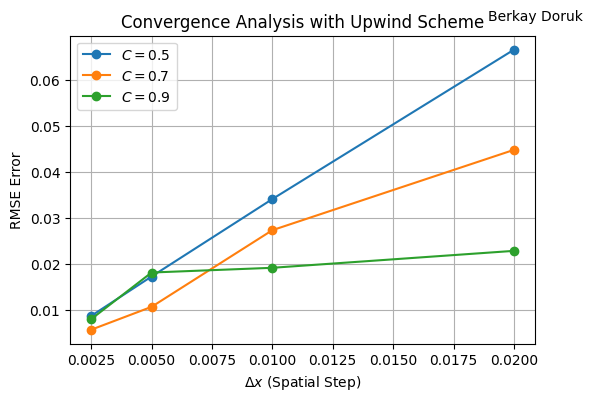

In [34]:
plt.figure(figsize=(6,4))
for C in C_values:
    dx_list, error_list = errors_by_C[C]
    plt.plot(dx_list, error_list, marker='o', label=f"$C = {C}$")

plt.xlabel("$\\Delta x$ (Spatial Step)")
plt.ylabel("RMSE Error")
plt.title("Convergence Analysis with Upwind Scheme")
plt.legend()
plt.grid(True)
plt.text(1, 1.05, "Berkay Doruk", ha='center', transform=plt.gca().transAxes)
plt.show()


## Conclusion

- The plot shows that the RMSE error gets smaller as the spatial step $ \Delta x $ gets smaller. This means the upwind method is working correctly and gets more accurate on finer grids.
- We compared three Courant numbers: $ C = 0.5 $, $ C = 0.7 $, and $ C = 0.9 $.
  - For $ C = 0.5 $, the error is higher, especially on coarse grids. But when we use more points (smaller $ \Delta x $), the error goes down.
  - For $ C = 0.7 $, the error is lower than $ C = 0.5 $ and still gets better as we refine the grid.
  - For $ C = 0.9 $, the error is already low, even on coarse grids. But it doesnt improve as much when we make the grid finer. It is also closer to the stability limit so the behavior might not always be smooth.
- Smaller $ \Delta x $ gives better results (lower RMSE error), but it also takes more time to compute.
- So, we need to find a balance: smaller steps give better accuracy, but take longer to run.
- The way the error goes down when we double the number of points shows that the method has first-order accuracy.